In [2]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
results_dir = "results/"
processes = range(10, 16)

impl1_training, impl2_training = [], []
impl1_total, impl2_total = [], []

for p in processes:
    # find files for these process
    f1 = next(f for f in os.listdir(results_dir) if re.search(fr"rmse_results_inmem_np{p}", f))
    f2 = next(f for f in os.listdir(results_dir) if re.search(fr"rmse_results_memeff_np{p}", f))

    with open(os.path.join(results_dir, f1)) as fh1:
        d1 = json.load(fh1)
    with open(os.path.join(results_dir, f2)) as fh2:
        d2 = json.load(fh2)

    impl1_training.append(d1["training_time_seconds"])
    impl1_total.append(d1["total_task_time_seconds"])
    impl2_training.append(d2["training_time_seconds"])
    impl2_total.append(d2["total_task_time_seconds"])


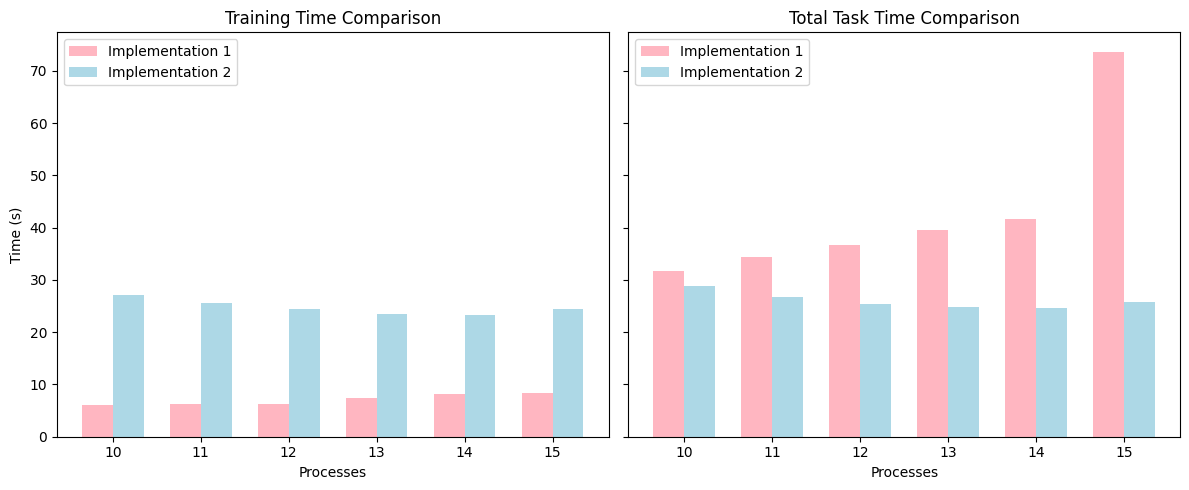

In [ ]:
x = np.arange(len(processes))
width = 0.35

# sharey=True ensures both subplots use the same y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training time
axes[0].bar(x - width/2, impl1_training, width, label="Implementation 1", color='#ffb6c1')
axes[0].bar(x + width/2, impl2_training, width, label="Implementation 2", color="#add8e6")
axes[0].set_xticks(x)
axes[0].set_xticklabels(processes)
axes[0].set_xlabel("Processes")
axes[0].set_ylabel("Time (s)")   # generic since both plots share the axis
axes[0].set_title("Training Time Comparison")
axes[0].legend(loc="upper left")

# Total task time
axes[1].bar(x - width/2, impl1_total, width, label="Implementation 1", color='#ffb6c1')
axes[1].bar(x + width/2, impl2_total, width, label="Implementation 2", color="#add8e6")
axes[1].set_xticks(x)
axes[1].set_xticklabels(processes)
axes[1].set_xlabel("Processes")
axes[1].set_title("Total Task Time Comparison")
axes[1].legend(loc="upper left")

plt.tight_layout()
plt.show()